Largest blob found with area: 9931


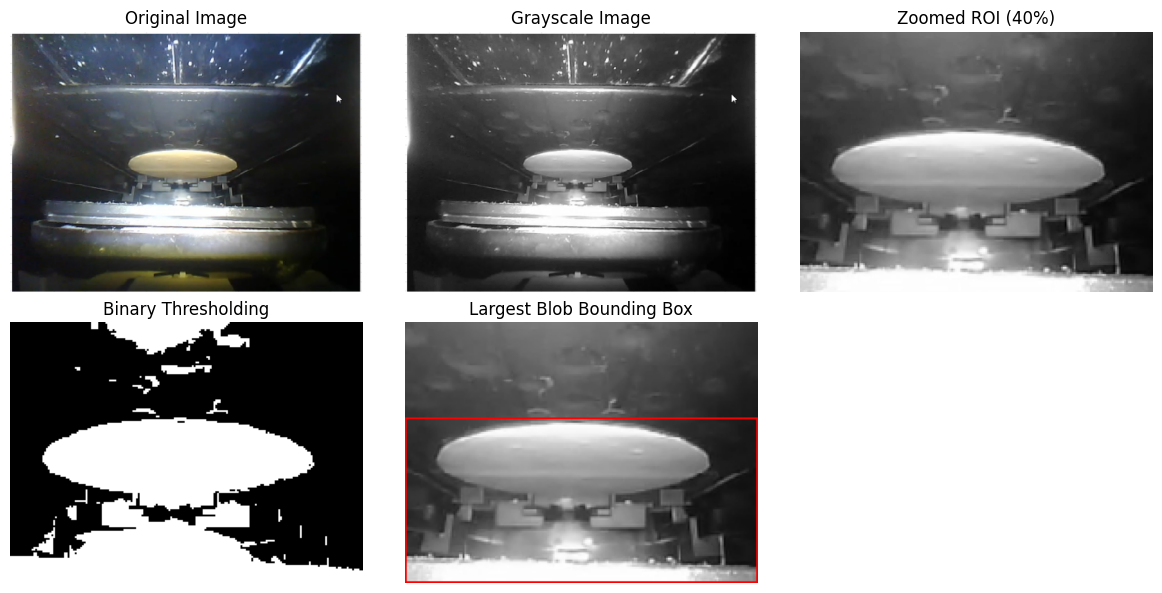

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def process_image(image_path, area_threshold):
    # Step 1: Load the image
    image = Image.open(image_path)
    image_array = np.array(image)

    # Display the original image
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 3, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    # Step 2: Convert to grayscale
    grayscale = np.dot(image_array[..., :3], [0.299, 0.587, 0.114]).astype(np.uint8)

    # Display the grayscale image
    plt.subplot(2, 3, 2)
    plt.imshow(grayscale, cmap="gray")
    plt.title("Grayscale Image")
    plt.axis("off")

    # Step 3: Zoom into the image (50%) and define the ROI
    height, width = grayscale.shape
    zoom_scale = 0.4  # Zoom factor: 40%
    new_width = int(width * zoom_scale)
    new_height = int(height * zoom_scale)

    x_start = (width - new_width) // 2
    x_end = x_start + new_width
    y_start = (height - new_height) // 2
    y_end = y_start + new_height

    # Extract the zoomed ROI
    roi = grayscale[y_start:y_end, x_start:x_end]

    # Display the zoomed ROI
    plt.subplot(2, 3, 3)
    plt.imshow(roi, cmap="gray")
    plt.title("Zoomed ROI (40%)")
    plt.axis("off")

    # Step 4: Apply binary thresholding
    threshold = 110  # Adjust threshold as needed
    binary = (roi > threshold).astype(np.uint8)

    # Display the binary thresholded image
    plt.subplot(2, 3, 4)
    plt.imshow(binary, cmap="gray")
    plt.title("Binary Thresholding")
    plt.axis("off")

    # Step 5: Detect the largest white blob using a connected component algorithm
    def connected_components(binary_image):
        h, w = binary_image.shape
        labels = np.zeros_like(binary_image, dtype=np.int32)
        label = 1
        areas = {}
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right

        def bfs(start):
            queue = [start]
            blob_pixels = []
            while queue:
                x, y = queue.pop(0)
                if labels[x, y] == 0 and binary_image[x, y] == 1:
                    labels[x, y] = label
                    blob_pixels.append((x, y))
                    for dx, dy in directions:
                        nx, ny = x + dx, y + dy
                        if 0 <= nx < h and 0 <= ny < w and labels[nx, ny] == 0:
                            queue.append((nx, ny))
            return blob_pixels

        for i in range(h):
            for j in range(w):
                if binary_image[i, j] == 1 and labels[i, j] == 0:
                    blob_pixels = bfs((i, j))
                    areas[label] = len(blob_pixels)
                    label += 1

        return labels, areas

    labels, areas = connected_components(binary)

    # Find the largest blob
    largest_label = max(areas, key=areas.get, default=None)
    largest_blob_area = areas.get(largest_label, 0)

    # Step 6: Check if the blob covers the area threshold
    if largest_blob_area >= area_threshold:
        print(f"Largest blob found with area: {largest_blob_area}")
        # Step 7: Draw a bounding box around the blob
        blob_indices = np.argwhere(labels == largest_label)
        min_x, min_y = blob_indices[:, 0].min(), blob_indices[:, 1].min()
        max_x, max_y = blob_indices[:, 0].max(), blob_indices[:, 1].max()

        # Draw bounding box on ROI
        boxed_image = np.stack([roi] * 3, axis=-1)  # Convert grayscale to RGB
        for x in range(min_x, max_x + 1):
            boxed_image[x, min_y] = [255, 0, 0]  # Left edge
            boxed_image[x, max_y] = [255, 0, 0]  # Right edge
        for y in range(min_y, max_y + 1):
            boxed_image[min_x, y] = [255, 0, 0]  # Top edge
            boxed_image[max_x, y] = [255, 0, 0]  # Bottom edge

        # Display the bounding box
        plt.subplot(2, 3, 5)
        plt.imshow(boxed_image)
        plt.title("Largest Blob Bounding Box")
        plt.axis("off")
    else:
        print("No significant blob found.")
        plt.subplot(2, 3, 5)
        plt.text(0.5, 0.5, "No Blob Found", ha="center", va="center")
        plt.axis("off")

    # Show all visualizations
    plt.tight_layout()
    plt.show()

# Example Usage
process_image("Discc/5.jpg", area_threshold=200)
